### Black friday Eda and data cleaning

In [119]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [120]:
df = pd.read_csv("train.csv")

In [121]:
df.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [122]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [123]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [124]:
df2=pd.read_csv("test.csv")

In [125]:
df2.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [126]:
df2.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [127]:
final=df.append(df2,ignore_index=True)

### working with categorical data

In [128]:
final.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [129]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


##### so our object is user id, product id, gender , age , city category , stay is current city years. so, we need to convert gender , age,city,city years to numerical data.we can drop user id since it;s has no use with the analysis

##### Gender 

In [130]:
 final["Gender"].replace(["F","M"],[0,1],inplace=True)

In [131]:
final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


### gender 

In [132]:
final["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [133]:
final["Age"].replace(["0-17","18-25","36-45","26-35","46-50","51-55","55+"],[1,2,3,4,5,6,7],inplace=True )

In [134]:
final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,4,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,0,4,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,0,4,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


### city category

#### city category have three categorical data, we can delete one column as 2 are enough to represent 3 kinds. 

In [135]:
final_city=pd.get_dummies(final["City_Category"],drop_first=True)

In [136]:
final=pd.concat([final,final_city],axis=1)

In [137]:
final

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,4,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,1006036,P00254642,0,4,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,1006036,P00031842,0,4,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [138]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  uint8  
 13  C             

### column B & C are of unit8 of dtype , so we need to change it to int or float values.

In [139]:
final['B']= final['B'].astype(int)

In [140]:
final['C']= final['C'].astype(int)

In [141]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  int32  
 13  C             

###  'stay in current city'

In [142]:
final['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [143]:
final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].str.replace("+"," ")

C:\Users\Rukaia\AppData\Local\Temp/ipykernel_16256/238710348.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final['Stay_In_Current_City_Years']=final['Stay_In_Current_City_Years'].str.replace("+"," ")


In [144]:
final['Stay_In_Current_City_Years'].unique()


array(['2', '4 ', '3', '1', '0'], dtype=object)

In [145]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  int32  
 13  C             

#### so change stay in current city years from object to int 

In [146]:
final['Stay_In_Current_City_Years']= final['Stay_In_Current_City_Years'].astype(int)

In [147]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  B                           783667 non-null  int32  
 13  C             

### so the only remaining object type is Product Id , it can be a object ,, It would not affect the ML process. 

#### dropping the useless columns : City_category, user id

In [148]:
final.drop(["City_Category","User_ID"],axis=1,inplace=True)

In [149]:
final

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,4,15,4,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,4,15,4,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,4,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,NaN,NaN,0,1


#### done with the categorical values now null values

### Null values

In [150]:
final.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### product category 2 and 3 , and purchase have null values, but we cannot remove null from purchase, as it's coming from test data set. Cross validation has been done here.

### product category 2 

In [151]:
final['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

#### so the product category is a discreate feature as it repeated same values over and over again. so for discreate and categorial values we do mode()

In [152]:
final['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

#### check mode for product category 2

In [153]:
final['Product_Category_2'].mode()

0    8.0
dtype: float64

#### we have 2 mode values 0 and 8. 0 is for the null values. so we are counting on 8 to replace the null values

In [154]:
final['Product_Category_2']=final['Product_Category_2'].fillna(final['Product_Category_2'].mode()[0])

In [155]:
final['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

#### we would do the same process for product cat 3 as the have the same represantation

In [156]:
final['Product_Category_3'].mode()

0    16.0
dtype: float64

In [157]:
final['Product_Category_3']=final['Product_Category_3'].fillna(final['Product_Category_3'].mode()[0])

In [158]:
final['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [159]:
final.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### so we are done with the cleaning the nullvalues and replacing the categorical features to int or float. now,basic
## visalizations

#### pairplot would showed a error as duplicated index, it was created because of we concat two data sets , train and test, so some dup;icated row index was there, so, we fix it by ignore_index to where we concate

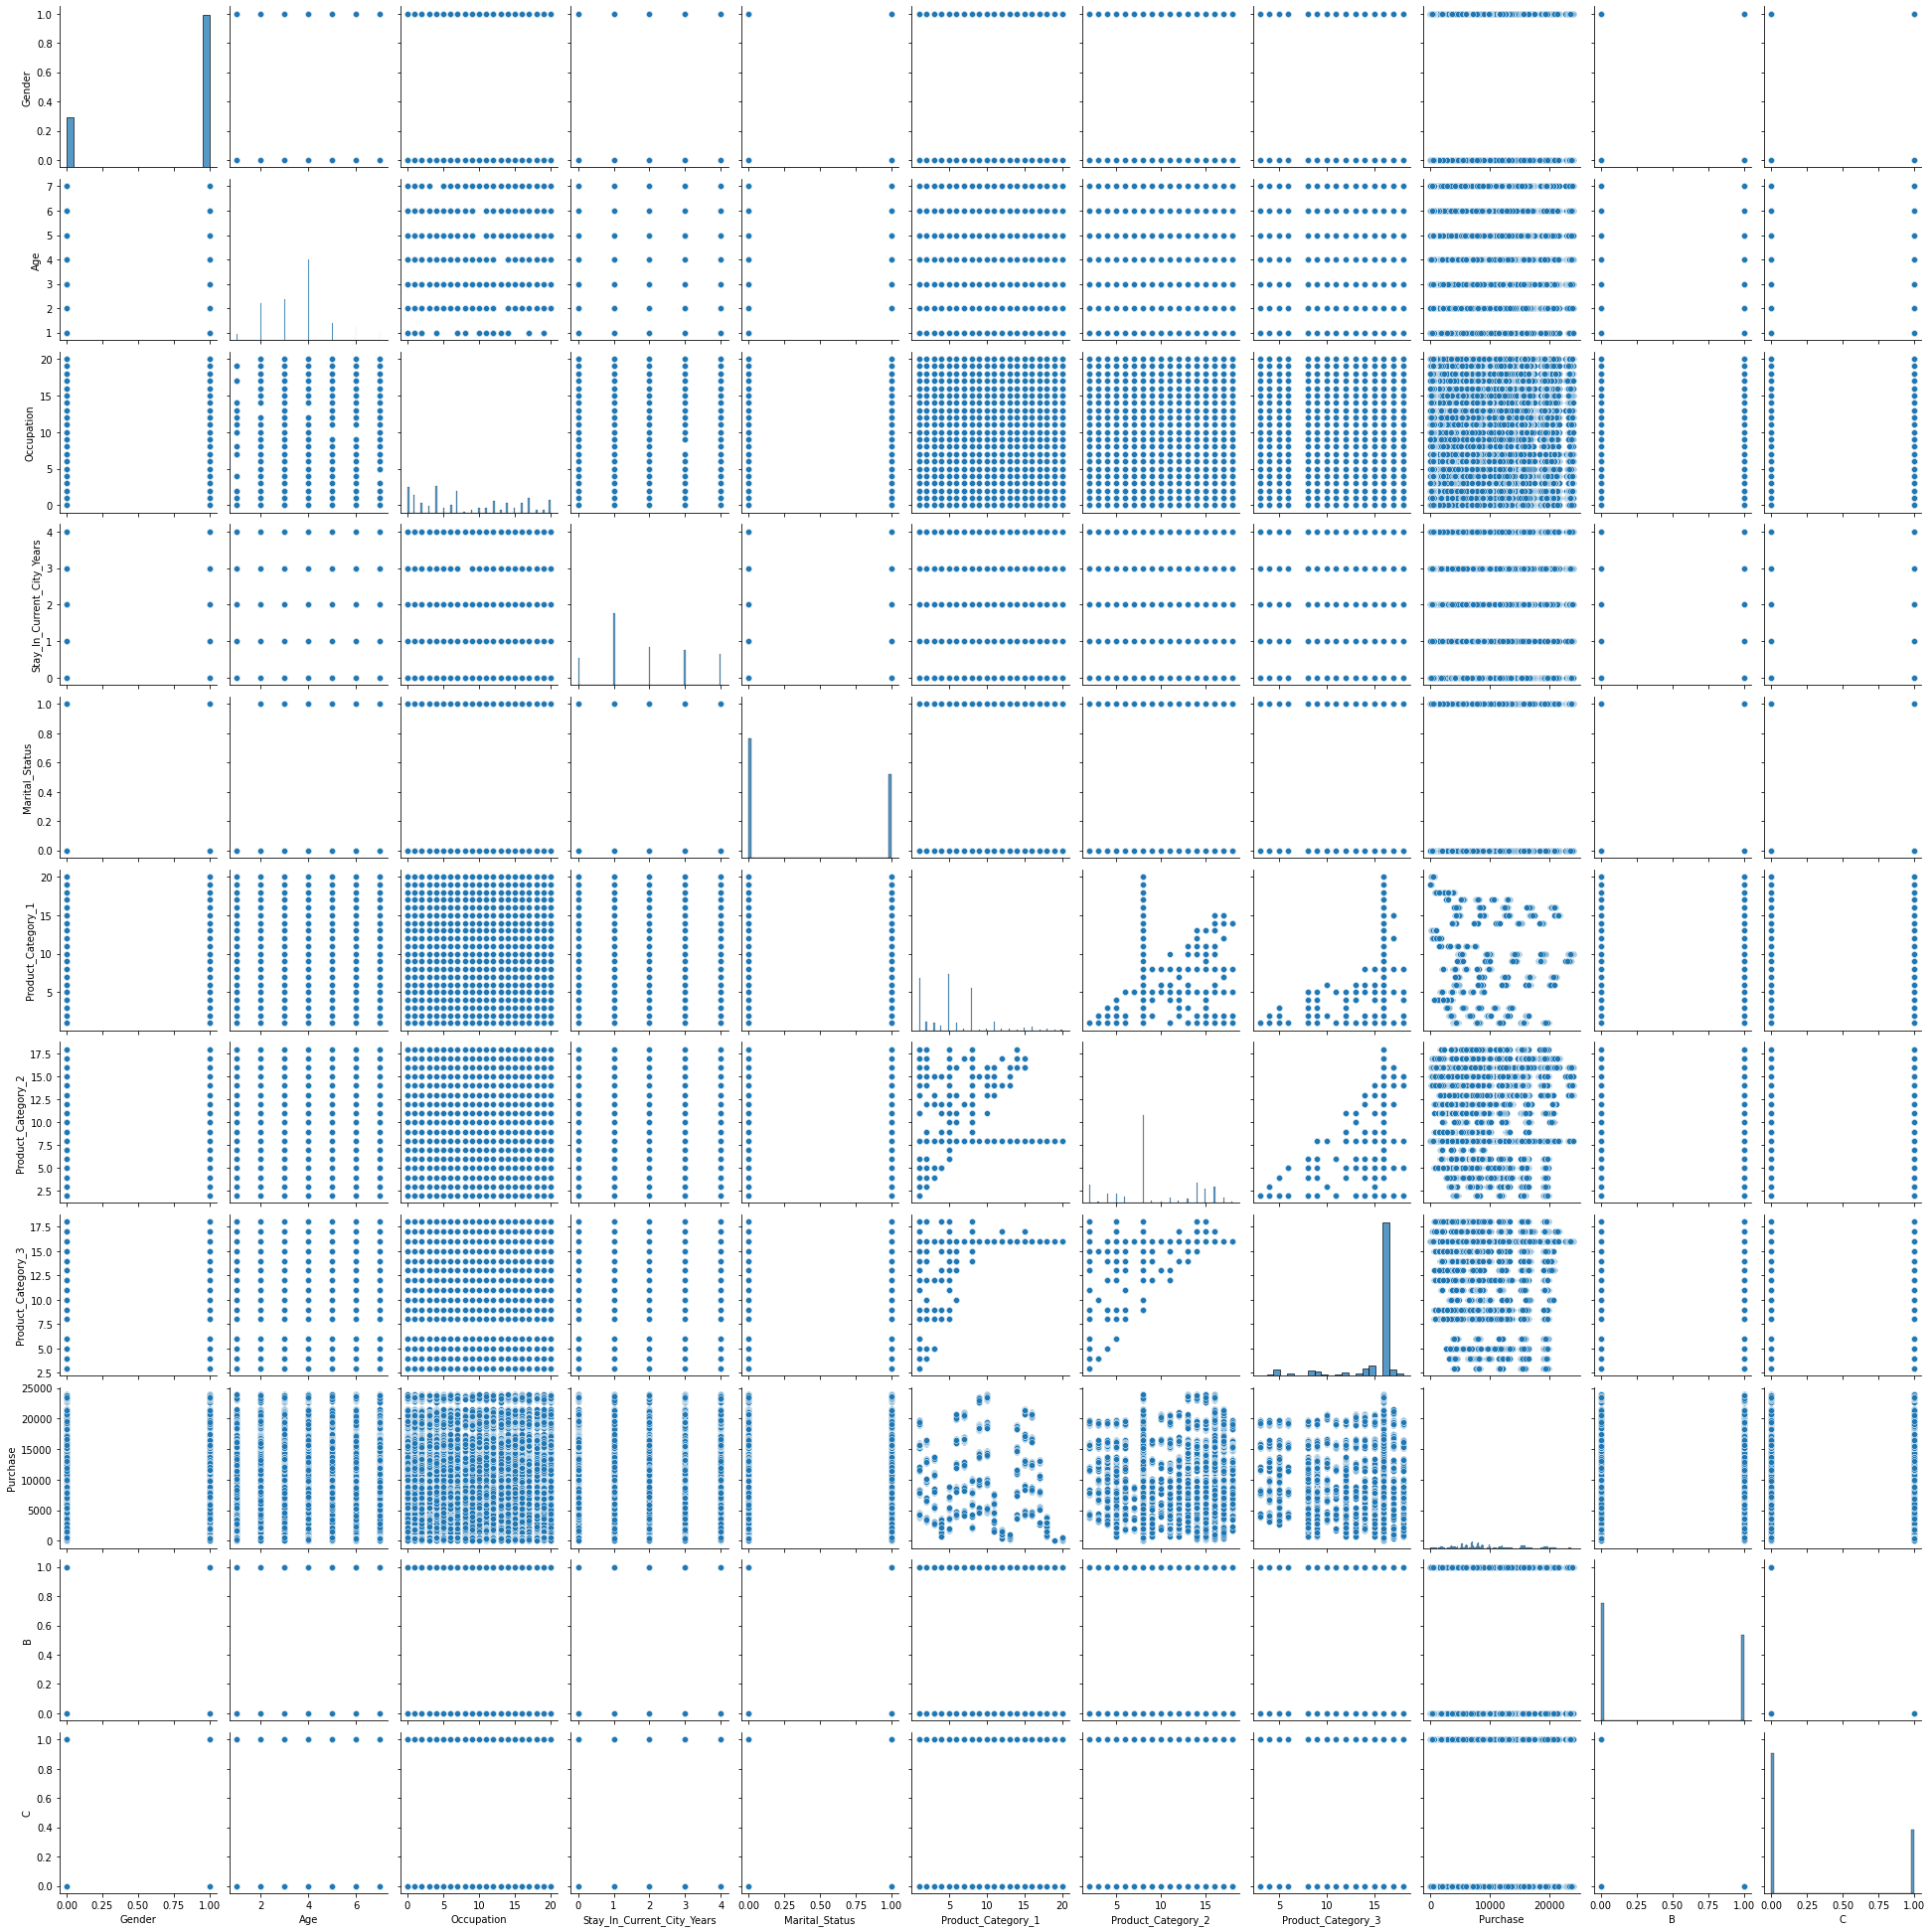

In [160]:
sns.pairplot(final)

#### bar plot to show purcahse amount by Age and gender gender

In [164]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

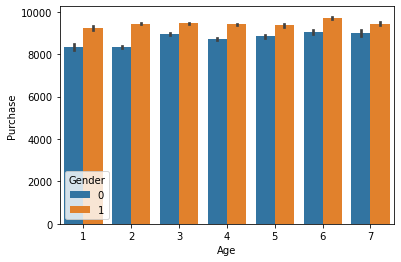

In [171]:
sns.barplot('Age','Purchase',hue='Gender',data=final)

#### we replace 0 for female and 1 for male. so our observation is men purchased more than female. and the distribution is uniform

#### bar plot to show purcahse amount by product category

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

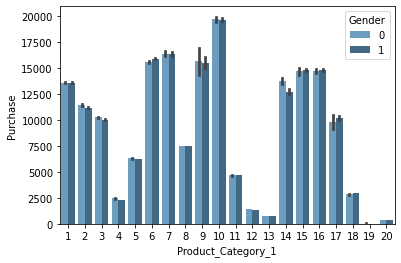

In [174]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=final,palette="Blues_d")

#### so the observation is for value 10 of product category 1 was more purchased than any other values

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

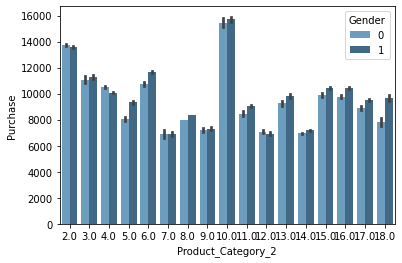

In [178]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=final,palette="Blues_d")

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

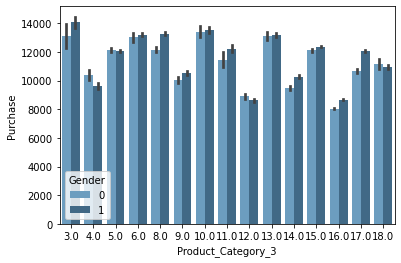

In [179]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=final,palette="Blues_d")

#### marital status and purchasing

In [195]:
married=final['Marital_Status'].unique()

In [189]:
married_count=final['Marital_Status'].value_counts().values

([<matplotlib.patches.Wedge at 0x1c1c0760ac0>,
 [Text(-0.30762903603285247, 1.0561081271297452, '0'),
  Text(0.30762913491282995, -1.0561080983274316, '1')],
 [Text(-0.1677976560179195, 0.5760589784344065, '59.02%'),
  Text(0.16779770995245266, -0.5760589627240535, '40.98%')])

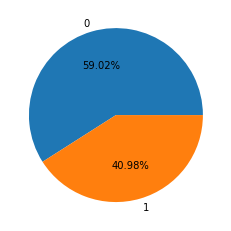

In [199]:
plt.pie(married_count,labels=married,autopct='%1.2f%%')

#### so unmarried people purchased more

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

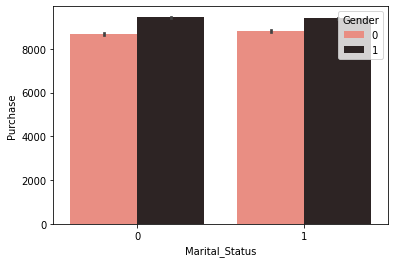

In [202]:
sns.barplot('Marital_Status','Purchase',hue='Gender',data=final,palette="dark:salmon_r")

#### marital status   0: unmarried, 1:married
#### gender staus    0:female, 1:male

### so , married females purchased slightly more than unmarried females
###  the purchase amount for both married and unmarried men are quite same

C:\Users\Rukaia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

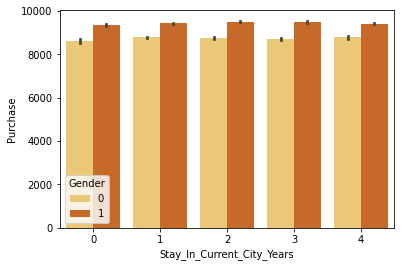

In [204]:
sns.barplot('Stay_In_Current_City_Years','Purchase',hue='Gender',data=final,palette="YlOrBr")